<a href="https://colab.research.google.com/github/alanthomas200/-HactoberFest2022-For_All_Beginers-/blob/main/Weather_Forecasting_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import io
from google.colab import files

##reading the data
uploaded = files.upload()

Saving DailyDelhiClimateTest.csv to DailyDelhiClimateTest (1).csv


In [ ]:
data = pd.read_csv("DailyDelhiClimateTest.csv")
print(data.head())

         date   meantemp   humidity  wind_speed  meanpressure
0  2017-01-01  15.913043  85.869565    2.743478     59.000000
1  2017-01-02  18.500000  77.222222    2.894444   1018.277778
2  2017-01-03  17.111111  81.888889    4.016667   1018.333333
3  2017-01-04  18.700000  70.050000    4.545000   1015.700000
4  2017-01-05  18.388889  74.944444    3.300000   1014.333333


In [ ]:
print(data.describe())

         meantemp    humidity  wind_speed  meanpressure
count  114.000000  114.000000  114.000000    114.000000
mean    21.713079   56.258362    8.143924   1004.035090
std      6.360072   19.068083    3.588049     89.474692
min     11.000000   17.750000    1.387500     59.000000
25%     16.437198   39.625000    5.563542   1007.437500
50%     19.875000   57.750000    8.069444   1012.739316
75%     27.705357   71.902778   10.068750   1016.739583
max     34.500000   95.833333   19.314286   1022.809524


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB
None


In [ ]:
figure =px.line(data,x="date",y="meantemp",title="mean temperature in Delhi over the years")
figure.show()

In [ ]:
figure = px.line(data,x="date",y="humidity",title="Humidity in Delhi over the years")
figure.show()

In [ ]:
figure=px.line(data,x="date",y="wind_speed",title="Wind speed in Delhi over the year")
figure.show()

In [ ]:
figure=px.scatter(data_frame=data,x="humidity",y="meantemp",size="meantemp",trendline="ols",title="Relation between temperature and humidity")
figure.show()

In [ ]:
data["date"] = pd.to_datetime(data["date"], format = '%Y-%m-%d')
data['year'] = data['date'].dt.year
data["month"] = data["date"].dt.month
print(data.head())

        date   meantemp   humidity  wind_speed  meanpressure  year  month
0 2017-01-01  15.913043  85.869565    2.743478     59.000000  2017      1
1 2017-01-02  18.500000  77.222222    2.894444   1018.277778  2017      1
2 2017-01-03  17.111111  81.888889    4.016667   1018.333333  2017      1
3 2017-01-04  18.700000  70.050000    4.545000   1015.700000  2017      1
4 2017-01-05  18.388889  74.944444    3.300000   1014.333333  2017      1


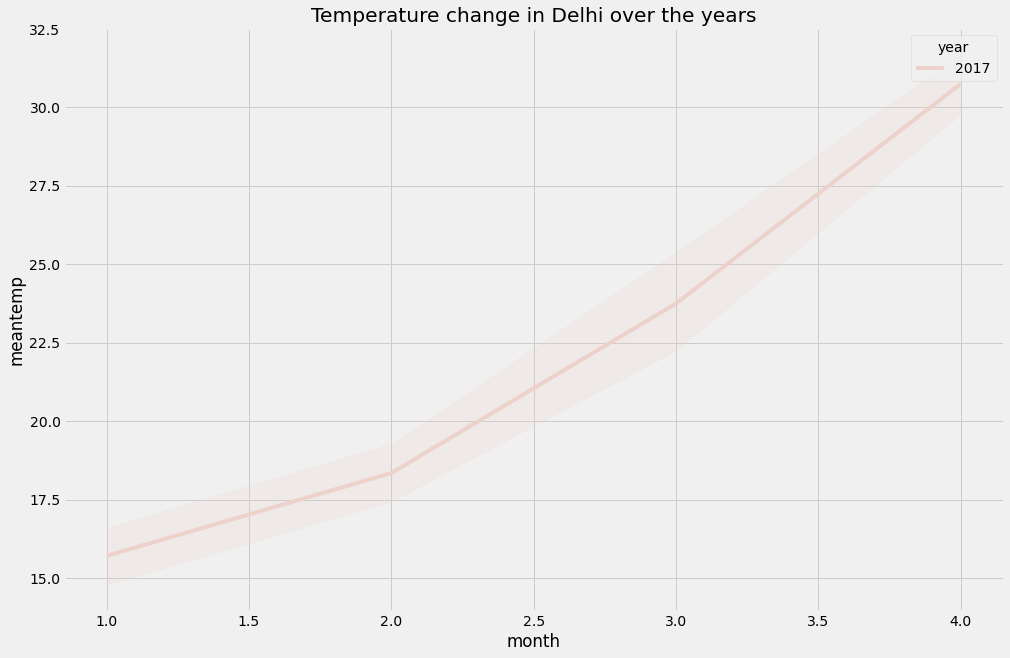

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.title("Temperature change in Delhi over the years")
sns.lineplot(data = data, x='month', y='meantemp', hue='year')
plt.show()

In [ ]:
forecast_data = data.rename(columns = {"date": "ds", 
                                       "meantemp": "y"})
print(forecast_data)

            ds          y   humidity  wind_speed  meanpressure  year  month
0   2017-01-01  15.913043  85.869565    2.743478     59.000000  2017      1
1   2017-01-02  18.500000  77.222222    2.894444   1018.277778  2017      1
2   2017-01-03  17.111111  81.888889    4.016667   1018.333333  2017      1
3   2017-01-04  18.700000  70.050000    4.545000   1015.700000  2017      1
4   2017-01-05  18.388889  74.944444    3.300000   1014.333333  2017      1
..         ...        ...        ...         ...           ...   ...    ...
109 2017-04-20  34.500000  27.500000    5.562500    998.625000  2017      4
110 2017-04-21  34.250000  39.375000    6.962500    999.875000  2017      4
111 2017-04-22  32.900000  40.900000    8.890000   1001.600000  2017      4
112 2017-04-23  32.875000  27.500000    9.962500   1002.125000  2017      4
113 2017-04-24  32.000000  27.142857   12.157143   1004.142857  2017      4

[114 rows x 7 columns]


In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model = Prophet()
model.fit(forecast_data)
forecast = model.make_future_dataframe(periods=365)
predictions = model.predict(forecast)
plot_plotly(model, predictions)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5ztjn_89/x2nxfnod.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5ztjn_89/7fr4s5qd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68576', 'data', 'file=/tmp/tmp5ztjn_89/x2nxfnod.json', 'init=/tmp/tmp5ztjn_89/7fr4s5qd.json', 'output', 'file=/tmp/tmp5ztjn_89/prophet_modelfte5t6ig/prophet_model-20221113110014.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:00:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:00:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
